In [238]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [239]:
df_train=pd.read_excel("/content/Data_Train.xlsx")
df_test=pd.read_excel('/content/Data_Test.xlsx')

In [240]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
71,QUICK BITES,2787,North Indian,11:30am – 4am (Mon-Sun),New Delhi,Rohini,3.6,53 votes,200
72,CASUAL DINING,10614,"North Indian, Mughlai",12noon – 12midnight (Mon-Sun),Mumbai,Kurla Complex,4.3,380 votes,1800
73,QUICK BITES,8887,"Fast Food, Momos",11am – 11:30pm (Mon-Sun),New Delhi,Satyaniketan,4.0,405 votes,150
74,CASUAL DINING,10327,"Pizza, Fast Food",11am – 3am (Mon-Sun),Mumbai,Kandivali West,4.3,1920 votes,650


In [241]:
df_train.shape

(12690, 9)

In [242]:
df_train.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [243]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [244]:
df_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [245]:
df_test.shape

(4231, 8)

In [246]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [247]:
df_train.max()

TITLE                                      SWEET SHOP,QUICK BITES
RESTAURANT_ID                                               15573
CUISINES         Wraps, Sandwich, Rolls, Fast Food, Burger, Pizza
TIME                                                Not Available
COST                                                        14000
dtype: object

In [248]:
df_train['COST'].mean()

655.2522458628841

In [250]:
df_train.describe()


,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [249]:
df_train[['TITLE','COST']]

,TITLE,COST
0,CASUAL DINING,1200
1,"CASUAL DINING,BAR",1500
2,CASUAL DINING,800
3,QUICK BITES,800
4,DESSERT PARLOR,300
...,...,...
12685,QUICK BITES,500
12686,"CASUAL DINING,BAR",1800
12687,LOUNGE,1300
12688,CASUAL DINING,400


In [251]:
df_train['CITY'].value_counts()

Chennai                   2174
Bangalore                 2149
Hyderabad                 1819
Mumbai                    1722
New Delhi                 1321
                          ... 
Kochi Elamkulam              1
Bangalore Road               1
Malleshwaram Bangalore       1
Dewan Rama Road              1
Phase 1 Bangalore            1
Name: CITY, Length: 359, dtype: int64

In [252]:
df_train['RATING'].value_counts()

3.9    1238
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
NEW     707
3.4     575
4.3     556
-       495
3.3     365
4.4     362
3.2     266
4.5     199
3.1     186
2.9     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.2       2
2.0       2
Name: RATING, dtype: int64

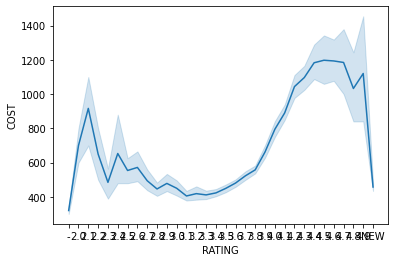

In [253]:
sns.lineplot( x=df_train["RATING"], y=df_train["COST"])

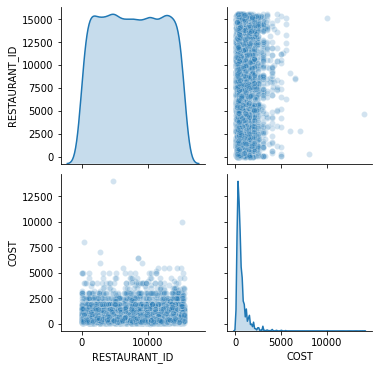

In [254]:
sns.pairplot(df_train, diag_kind='kde', plot_kws={'alpha': 0.2})

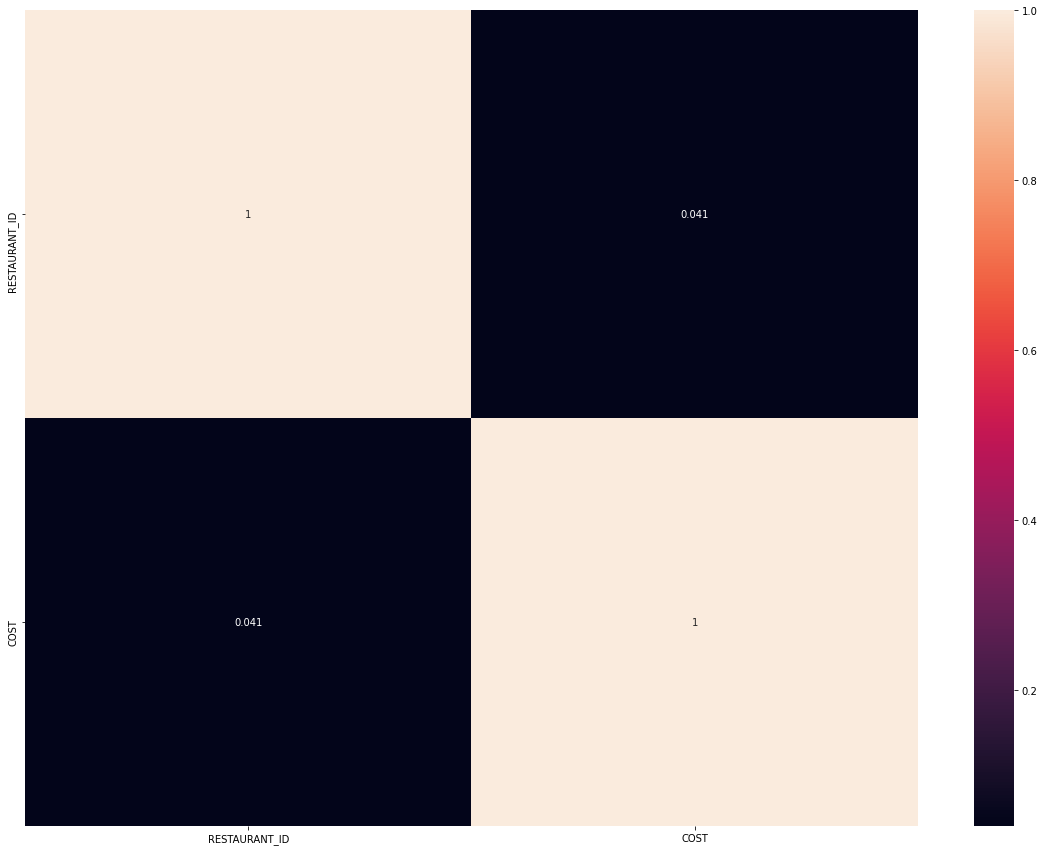

In [255]:
corr_hmap=df_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [256]:

df_train['CITY'].fillna('Chennai',inplace=True)
df_test['CITY'].fillna('Bangalore',inplace=True)
df_train['LOCALITY'].fillna('Gachibowli',inplace=True)
df_test['LOCALITY'].fillna('Kakkanad',inplace=True)
df_train['VOTES'].fillna('44 votes',inplace=True)
df_test['VOTES'].fillna('6 votes',inplace=True)


In [257]:
df_train['VOTES']=df_train['VOTES'].str.replace('votes','').astype(int)
df_test['VOTES']=df_test['VOTES'].str.replace('votes','').astype(int)

In [258]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [259]:
df_train.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [260]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12688 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12688 non-null  object
 1   RESTAURANT_ID  12688 non-null  int64 
 2   CUISINES       12688 non-null  object
 3   TIME           12688 non-null  object
 4   CITY           12688 non-null  object
 5   LOCALITY       12688 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          12688 non-null  int64 
 8   COST           12688 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 991.2+ KB


In [261]:
df_train['RATING']=df_train['RATING'].str.replace('NEW','3.9').str.replace('-','3.9').astype(float)
df_test['RATING']=df_test['RATING'].str.replace('NEW','3.9').str.replace('-','3.9').astype(float)

In [262]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12688 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12688 non-null  object 
 1   RESTAURANT_ID  12688 non-null  int64  
 2   CUISINES       12688 non-null  object 
 3   TIME           12688 non-null  object 
 4   CITY           12688 non-null  object 
 5   LOCALITY       12688 non-null  object 
 6   RATING         12688 non-null  float64
 7   VOTES          12688 non-null  int64  
 8   COST           12688 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 991.2+ KB


In [263]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_train.columns:
    df_train[column] = labelencoder.fit_transform(df_train[column])
for column in df_train.columns:
    df_train[column] = labelencoder.fit_transform(df_train[column])

In [264]:
from scipy.stats import zscore
z_score=abs(zscore(df_train))
print(df_train.shape)
df1=df_train.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(12688, 9)
(12066, 9)


In [265]:
x=df1.iloc[:,0:-1]
y=df1.iloc[:,-1]


In [266]:
x,y

(       TITLE  RESTAURANT_ID  CUISINES  TIME  CITY  LOCALITY  RATING  VOTES
 0         31           7196      2627   739   320       285      16     45
 1         33          10075       289  1885    67      1046      22     26
 2         31           8349      2976   661    67      1101      18    217
 3         95           4876      4130   275   222       136      21     20
 4         50          11745      1766   615   222       620      18    161
 ...      ...            ...       ...   ...   ...       ...     ...    ...
 12685     95          10100      2934  1144   131       342      18    542
 12686     33           7390      2143  1177   222       133      23   1123
 12687     71           8518      2088  1137   239      1342      20    604
 12688     31           4718      3506  1837    67       631      15     28
 12689     31           4941      2946   835   131      1333      14    670
 
 [12066 rows x 8 columns], 0        36
 1        43
 2        28
 3        28
 4      

In [267]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [268]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [269]:
print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8446, 8)
The size of training output is (8446,)
**************************************************
The size of testing input is (3620, 8)
The size of testing output is (3620,)


Applying GridSearchCV with Ridge Regressor 

In [270]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(x_train ,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [271]:
y_train_pred =ridge_regressor.predict(x_train) ##Predict train result
y_test_pred =ridge_regressor.predict(x_test) ##Predict test result

In [272]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  8.810828056839837
Mean absolute % error:  inf
R-squared:  0.29786610586314555


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [273]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  8.961928940956458
Mean absolute % error:  39.0
R-squared:  0.2662254767261144


Applying Lasso Regressor 

In [274]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(x_train ,y_train)

GridSearchCV(cv=15, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [275]:
y_train_pred =lasso_regressor.predict(x_train) ##Predict train result
y_test_pred =lasso_regressor.predict(x_test) ##Predict test result

In [276]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  8.814880173071892
Mean absolute % error:  inf
R-squared:  0.2972201319839558


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


Using KNN Regressor 

In [277]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [278]:
y_train_pred =knn_regressor.predict(x_train) ##Predict train result
y_test_pred =knn_regressor.predict(x_test) ##Predict test result

In [279]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  8.91922567446528
Mean absolute % error:  inf
R-squared:  0.28048344427778205


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [280]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  9.41536303686325
Mean absolute % errorr:  40.0
R-squared:  0.19009556504720637


Using Decision Tree Regressor for the model

In [281]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23,

In [282]:
y_train_pred =tree.predict(x_train) ##Predict train result
y_test_pred =tree.predict(x_test) ##Predict test result

In [283]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  5.0269260763738215
Mean absolute % error:  inf
R-squared:  0.7714446016224344


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [284]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  6.645521779358557
Mean absolute % error:  28.0
R-squared:  0.5965239057519546


Applying RandomSearchCv

In [285]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(x_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [286]:
y_train_pred = random_regressor.predict(x_train)
y_test_pred = random_regressor.predict(x_test)

In [287]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  3.7331434107747223
Mean absolute % error:  inf
R-squared:  0.8739520363390081


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [288]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  5.842137745124229
Mean absolute % error:  25.0
R-squared:  0.6881805352148801


Using XGBoosting for improving Acuracy 

In [289]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(x_train, y_train)

[17:40:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=20, n_job

In [290]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [291]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  4.652110811774015
Mean absolute % error:  inf
R-squared:  0.8042568432209987


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


In [292]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  5.634327780370946
Mean absolute % error:  25.0
R-squared:  0.7099693778304725


In [293]:
from sklearn.externals import joblib
joblib.dump(random_regressor,'PROJECT14_MODEL1.pkl')
model1=joblib.load('PROJECT14_MODEL1.pkl')
model1.predict(x_test)

array([26.07797712, 40.19348514, 16.07944242, ..., 15.75665627,
       15.04069354, 14.52538739])

After trying all model ,Random regressor perform good with R squre value 0.87 

**Finding from EDA **
* Averge costing of two person meal is around 655.5 upto 1400 max with average rating 3.9.
* costing varies with places like top cities (chennai,Banglore,Hydrabad) where  most of rasturent are situated.
* Their is no any strong correlation between any coumns in present dataset.
**conclusion**
costing of the meal is not fully but depend upon cuisines,Rating and city. 